In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os

In [258]:
offers = pd.read_excel("customer_segmentation.xlsx", sheet_name=0)
transactions = pd.read_excel("customer_segmentation.xlsx",sheet_name=1)

In [259]:
offers.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [260]:
transactions.head()

,Customer Last Name,Offer #
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26


In [261]:
n = 1
transactions["n"] = n

In [262]:
transactions.head()

,Customer Last Name,Offer #,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


# Combine into a single dataframe# 

There are two Excel sheets at your disposal. The first one is called OfferInformation which contains information on the offers extended on products. The other sheet is Transactions which contains information on customers' purchase records. Your task will be to load these two sheets as dataframes and then merge them according to a common column present in both sheets. This will enable you to visualize both the offers and transactions data in a single frame.



In [263]:
df = pd.merge(offers,transactions,on="Offer #")

In [264]:
df.head(25)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1
5,1,January,Malbec,72,56,France,False,Price,1
6,1,January,Malbec,72,56,France,False,Foster,1
7,1,January,Malbec,72,56,France,False,Sanders,1
8,1,January,Malbec,72,56,France,False,Butler,1
9,1,January,Malbec,72,56,France,False,Fisher,1


In [265]:
df.shape

(324, 9)

# Create an Offer-Transaction pivot table


Now that i have merged both offers and transactions sheets, time to group this data by Offer # for every customer. This can be done effectively with the help of a pivot table where every observation is indexed by the name of the customer ('Customer Last Name'), columns will represent the offer ID ('Offer #') and the values denote whether the offer was purchased by the customer ('n')



In [266]:
matrix = df.pivot_table(index = "Customer Last Name",columns = "Offer #",values="n")
matrix.head(25)

Offer #,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Customer Last Name,,,,,,,,,,,,,,,,,,,,,
Adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
Allen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Anderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Bailey,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Baker,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Barnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Bell,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Bennett,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Brooks,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
matrix.fillna(0, inplace=True)

In [268]:
matrix.head()

Offer #,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Customer Last Name,,,,,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [269]:
matrix.reset_index(inplace = True)

In [270]:
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Used Kmeans to cluster data


The management has made a decision to segment customers into 5 categories in order to analyse customer behaviour. Now that i have data in the proper format, time to apply KMeans clustering algorithm to form the required 5 clusters and look if any such meaningful clusters are formed.



In [271]:
from sklearn.cluster import KMeans

In [272]:
# Empty list for storing WCSS(within cluster sum of squares) across all values of k
dist = []

# Iterate from 1-9
for i in range(1,10):
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=i,init="k-means++", max_iter = 300,n_init=10, random_state=0)
    # Fit on data
    km.fit(matrix[matrix.columns[1:]])
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)
print(dist)

[281.9, 251.46031746031744, 227.625, 214.8799603174603, 207.14976076555024, 198.74999510252056, 186.99147727272725, 177.9788961038961, 173.02916666666667]


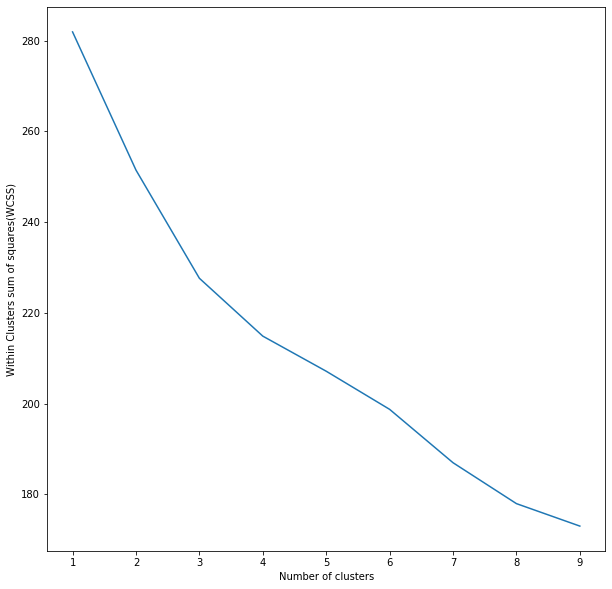

In [273]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(list(np.arange(1,10)),dist)
plt.ylabel("Within Clusters sum of squares(WCSS)")
plt.xlabel("Number of clusters")
plt.show()

best number of cluster will be 5

In [274]:
# initialize KMeans object
cluster = KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)

In [275]:
# create 'cluster' column
matrix["cluster"]= cluster.fit_predict(matrix[matrix.columns[1:]])

In [276]:
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [277]:
matrix.cluster.value_counts()

2    42
0    22
1    19
3    12
4     5
Name: cluster, dtype: int64

# Visualize clusters using PCA


Now that i have clustered my data, it will be great if i would perform some sort of visualization for effective interpretition. But since the data at hand is multidimensional, i cannot simply do it on a 2-D graph. A way around is using PCA to reduce the dimensionality to two dimensions so that i can visualize the clusters

In [278]:
from sklearn.decomposition import PCA

In [279]:
# initialize pca object with 2 components
pca = PCA(n_components=2,random_state=0)

# create 'x' and 'y' columns donoting observation locations in decomposed form
matrix["x"] = pca.fit_transform(matrix[matrix.columns[1:]])[:,0]
matrix["y"] = pca.fit_transform(matrix[matrix.columns[1:]])[:,1]

In [280]:
matrix.head(25)

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,cluster,x,y
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,-1.852539,-0.461418
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.482911,0.184745
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.635888,1.045145
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-1.686992,-0.353476
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.467738,-0.452672
5,Barnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1.656972,-0.322667
6,Bell,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.662068,1.500790
7,Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.134404,-0.467270
8,Brooks,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.575584,-0.374038
9,Brown,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,-1.840312,-0.602893


In [281]:
clusters = matrix.iloc[:,[0,33,34,35]]
clusters.head()

Offer #,Customer Last Name,cluster,x,y
0,Adams,0,-1.852539,-0.461418
1,Allen,2,0.482911,0.184745
2,Anderson,1,-0.635888,1.045145
3,Bailey,0,-1.686992,-0.353476
4,Baker,2,0.467738,-0.452672


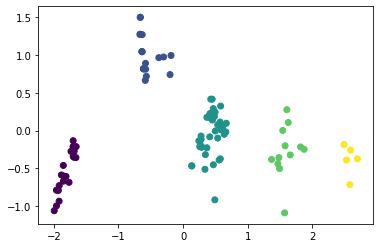

In [282]:
clusters = matrix.iloc[:,[0,33,34,35]]
plt.scatter(x=clusters["x"],y=clusters["y"],c=cluster.labels_)

In [283]:
cluster.labels_

array([0, 2, 1, 0, 2, 3, 1, 2, 2, 0, 3, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2,
       2, 3, 1, 3, 2, 2, 2, 1, 2, 2, 2, 4, 2, 0, 2, 0, 3, 0, 1, 1, 2, 2,
       0, 4, 0, 2, 2, 2, 2, 3, 2, 1, 3, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1,
       1, 2, 3, 2, 2, 2, 4, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1,
       2, 2, 4, 0, 2, 0, 3, 3, 0, 3, 4, 3], dtype=int32)

# Which cluster orders the most `Champagne`?

In this task i will be performing a set of data manipulation to bring data into the required form and then answer this question regarding Varietal feature: Which cluster orders the most Champagne?



In [284]:
data = pd.merge(clusters,transactions,on = "Customer Last Name")

In [285]:
data = pd.merge(offers,data)
data.head(25)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,cluster,x,y,n
0,1,January,Malbec,72,56,France,False,Butler,3,1.480626,-0.358515,1
1,1,January,Malbec,72,56,France,False,Fisher,3,1.577292,-0.201546,1
2,1,January,Malbec,72,56,France,False,Foster,3,1.625904,0.106931,1
3,1,January,Malbec,72,56,France,False,Jackson,3,1.605140,0.276741,1
4,1,January,Malbec,72,56,France,False,Mitchell,2,0.427834,0.416459,1
5,1,January,Malbec,72,56,France,False,Peterson,1,-0.375176,0.965950,1
6,1,January,Malbec,72,56,France,False,Price,3,1.492316,-0.503535,1
7,1,January,Malbec,72,56,France,False,Sanders,1,-0.186874,0.994762,1
8,1,January,Malbec,72,56,France,False,Thomas,1,-0.301325,0.975054,1
9,1,January,Malbec,72,56,France,False,Wood,3,1.541449,0.001854,1


In [286]:
champagne = {}

In [287]:
for i in data.cluster.unique():
    # observation falls in that cluster
    new_df = data[["cluster","Varietal"]]
    # sort cluster according to type of 'Varietal'
    counts = data[["cluster","Varietal"]]["Varietal"].value_counts(ascending=False)
    # check if 'Champagne' is ordered mostly
    if counts.index[0]=="Champagne":
        # add it to 'champagne'
        champagne[i]=counts[i]   

In [288]:
champagne

{3: 40, 2: 43, 1: 44, 4: 32, 0: 81}

In [289]:
counts

Champagne             81
Pinot Noir            44
Prosecco              43
Espumante             40
Cabernet Sauvignon    32
Malbec                32
Merlot                20
Pinot Grigio          17
Chardonnay            15
Name: Varietal, dtype: int64

In [290]:
data[["cluster","Varietal"]]["Varietal"].value_counts(ascending=False)

Champagne             81
Pinot Noir            44
Prosecco              43
Espumante             40
Cabernet Sauvignon    32
Malbec                32
Merlot                20
Pinot Grigio          17
Chardonnay            15
Name: Varietal, dtype: int64

In [291]:
cluster_champagne = max(champagne, key=champagne.get)
cluster_champagne

0

# Which cluster of customers favours discounts more on an average?

In this task i will find the cluster which repsonds most to discounts so that the management can target them specifically for discounted pricing options.

In [294]:
discount = {}

In [295]:
# iterate over cluster numbers
for i in data.cluster.unique():
    # dataframe for every cluster
    new_df = data[data["cluster"]==i]
    # average discount for cluster
    counts = new_df["Discount (%)"].values.sum()/len(new_df)
    
    # adding cluster number as key and average discount as value 
    discount[i]=counts


In [296]:
discount

{3: 59.916666666666664,
 2: 62.54545454545455,
 1: 55.95384615384615,
 4: 66.9090909090909,
 0: 55.04477611940298}

In [297]:
# cluster with maximum average discount
cluster_discount = max(discount, key=discount.get)
print(cluster_discount)

4


# Applying Hierarchical Clustering method

# Dendrogram Visualizasion:-

In [298]:
import scipy.cluster.hierarchy as sch

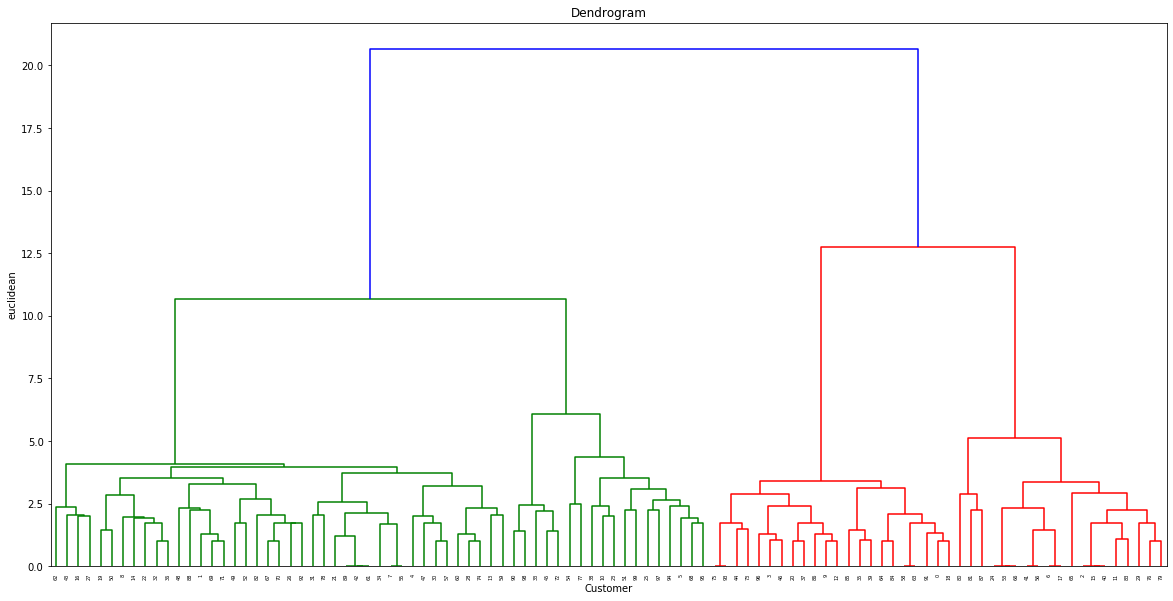

In [299]:
# initialize figure and axes
fig, ax = plt.subplots(1,1, figsize=(20,10))

# dendrogram with "ward" linkage
dend = sch.dendrogram(sch.linkage(matrix[matrix.columns[1:]],method="ward"),leaf_rotation=90, ax = ax)

# plot on a figure
ax.set_title("Dendrogram")
ax.set_xlabel('Customer')
ax.set_ylabel('euclidean')
plt.show()

from Dendrogram we can clearly see that number of clusters should be 4

In [300]:
from sklearn.cluster import AgglomerativeClustering

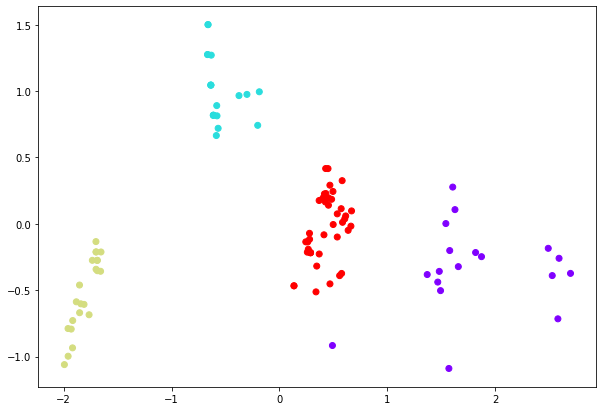

In [302]:
# initialize Agglomerative clustering object with 3 clusters
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  

# predict on dataset
cluster.fit_predict(matrix[matrix.columns[1:]])

# scater plot
plt.figure(figsize=(10, 7))  
plt.scatter(clusters["x"], clusters["y"], c=cluster.labels_, cmap='rainbow')  